# Vehicle Data Analysis and Visualizaion

This Zack Lee and this is my Lab 3. In this lab, my objectives will be:
• Extract and calculate important statistical measures from the vehicle dataset.
• Identify and handle missing and void values in the data.
• Create visual representations of the data to highlight key findings.

# Task 1 Data Analysis

In [1]:
#import statements
import pandas as pd
import numpy as np
import glob
import csv
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Grab all of the csv files
glob.glob('*.csv')

['vehicles_data.csv', 'Vehicle_Missing_Value.csv']

In [3]:
#Read the csv file and store it into a Data
vehicle_df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")
vehicle_df

C:\Users\footb\AppData\Local\Temp\ipykernel_24612\1694675723.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv('vehicles_data.csv', encoding = "ISO-8859-1")


,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803884,9/29/14,14:11:00,TIRES,GREAT SENECA HWY @ GREAT SENECA CREEK,02 - Automobile,1996.0,LEXUS,ES 300 4S,WHITE,ESERO,BLACK,M,500.0
803885,9/29/14,21:23:00,HEADLIGHTS (*),"7505 DEMOCRACY BLV ,MCG",02 - Automobile,2011.0,KIA,VN,RED,ESERO,BLACK,M,7217.0
803886,9/29/14,21:37:00,HEADLIGHTS (*),7300 TUCKERMAN LA AT 10998 WESTLAKE DR,02 - Automobile,2012.0,FIAT,2S,RED,ESERO,WHITE,F,7128.0
803887,9/28/14,23:33:00,HEADLIGHTS (*),DARNESTOWN RD @ QUINCE ORCHARD RD,02 - Automobile,1992.0,JEEP,TK,SILVER,ESERO,WHITE,M,500.0


# 1.1 Determine the 6-th Newest Year of Vehicles

In [4]:
#Convert the Year column to numeric (ignores bad strings)
vehicle_df['Year'] = pd.to_numeric(vehicle_df['Year'], errors='coerce')

#Filter only rows between 1885 and 2025
filtered_df = vehicle_df[(vehicle_df['Year'] >= 1885) & (vehicle_df['Year'] <= 2025)]

# sort newest → oldest
filtered_df = filtered_df.sort_values(by='Year', ascending=False)

# show the top vehicles by year
filtered_df


,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
40029,5/22/15,8:18:00,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,DORSET AVE/ RIVER RD,05 - Light Duty Truck,2025.0,ACUR,SUV,BLACK,Warning,OTHER,F,12330.0
573867,9/25/13,7:21:00,FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO...,410/GRUBB RD,02 - Automobile,2024.0,OLDSMOBILE,ALERO,SILVER,Citation,BLACK,F,11946.0
115609,9/8/15,2:14:00,DRIVER ENTERING INTERSECTION AT FLASHING RED T...,RT 270 NORTH OFFRAMP @ MONT. VILLAGE AVE,02 - Automobile,2024.0,CHEVROLET,IMPALA,"BLUE, LIGHT",Citation,BLACK,M,10909.0
74058,7/12/15,23:35:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,FLOWER AVE @ PINEY BRANCH RD,02 - Automobile,2023.0,HYUNDAI,ELANTRA,SILVER,Warning,BLACK,M,11549.0
30098,5/9/15,22:20:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,RT 355 / EDMONSTON DR,02 - Automobile,2023.0,NISS,SENTRA,BLACK,Warning,HISPANIC,M,11513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125380,9/24/15,20:18:00,"PEDESTRIAN FAIL TO OBEY ""DONT WALK"", ""UPRAISED...",MONTGOMERY VILLAGE AV / CHRISTOPHER AVE,28 - Other,1900.0,XX,XX,NaN,Citation,WHITE,M,500.0
339754,8/17/16,18:11:00,OPERATING A MOPED ON HWY. W/O REQ. LICENSE OR ...,HARRIS AVE / LAFAYETTE DR,02 - Automobile,1900.0,UNK,MOPED,BLUE,Citation,WHITE,M,500.0
785720,10/25/14,18:30:00,HEADLIGHTS (*),RT 27 AND RT 80,02 - Automobile,1894.0,FORD,BRONCO,BLUE,ESERO,WHITE,M,500.0
20587,4/26/15,20:49:00,TAG LIGHTS (*),200 NORWOOD RD,02 - Automobile,1887.0,NISSAN,QUEST,SILVER,ESERO,ASIAN,M,500.0


In [5]:
# make a new df with just price and year for the 6 newest vehicles
top_six_df = filtered_df[['Year', 'Price']][:6]
top_six_df

,Year,Price
40029,2025.0,12330.0
573867,2024.0,11946.0
115609,2024.0,10909.0
74058,2023.0,11549.0
30098,2023.0,11513.0
74059,2023.0,10549.0


# 1.2 Determine the 4 Oldest Vehicles

In [6]:
# Make a new df with jsut price and year for the 4 oldest vehicles
bottom_four = filtered_df[['Year', 'Price']][-4:]
bottom_four

,Year,Price
339754,1900.0,500.0
785720,1894.0,500.0
20587,1887.0,500.0
739122,1886.0,500.0


# 1.3 Identify and Count the Number of Missing Values in the Data Set

In [7]:
# get the count for all the null/missing values
missing_values_df = vehicle_df.isnull().sum()
missing_values_df = missing_values_df.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']

# sort by missing count (descending)
missing_values_df = missing_values_df.sort_values(by='Missing Values', ascending=False)
missing_values_df 

,Column Name,Missing Values
8,Color,10939
5,Year,6844
11,Gender,1658
12,Price,1658
7,Model,956
6,Make,872
3,Location,831
10,Race,829
4,VehicleType,829
9,Violation Type,829


# 1.4 Combine all Findings into one DataFrame and save as a CSV file

In [8]:
vehicle_combine_df = pd.concat([top_six_df, bottom_four])
final_df = pd.concat([vehicle_combine_df, missing_values_df])
final_df

,Year,Price,Column Name,Missing Values
40029,2025.0,12330.0,NaN,NaN
573867,2024.0,11946.0,NaN,NaN
115609,2024.0,10909.0,NaN,NaN
74058,2023.0,11549.0,NaN,NaN
30098,2023.0,11513.0,NaN,NaN
74059,2023.0,10549.0,NaN,NaN
339754,1900.0,500.0,NaN,NaN
785720,1894.0,500.0,NaN,NaN
20587,1887.0,500.0,NaN,NaN
739122,1886.0,500.0,NaN,NaN


In [9]:
# convert to a final csv file
final_df.to_csv("Vehicle_Missing_Value.csv", index = False)

# Task 2 Data Visualization

# 2.1 Scatter Plot

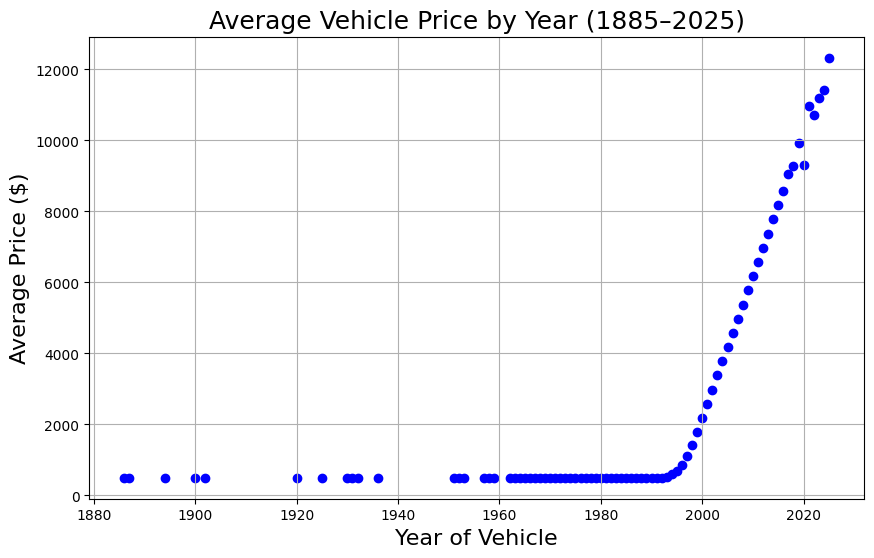

In [28]:
# Create a scatter plot graph to show all average price and the car years
filtered_df['Price'] = pd.to_numeric(filtered_df['Price'], errors='coerce')

# Group by year and calculate average vehicle price
avg_price_by_year = (
    filtered_df
    .dropna(subset=['Year', 'Price'])
    .assign(Year=lambda d: d['Year'].astype(int))
    .groupby('Year')['Price']
    .mean()
    .sort_index()
)

# Create the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(avg_price_by_year.index, avg_price_by_year.values, color='blue')

plt.title('Average Vehicle Price by Year (1885–2025)', fontsize=18)
plt.xlabel('Year of Vehicle', fontsize=16)
plt.ylabel('Average Price ($)', fontsize=16)
plt.grid(True)

plt.savefig('avg_vehicle_price.png', dpi=300, bbox_inches='tight')

plt.show()

The scatter plot above demonstrates the average vehicle price over the years, and as we can see, the average price of the vehicles
has significantly risen over the years, with most of the increase coming from the 1990-200

# 2.2 Bar Graph(s)

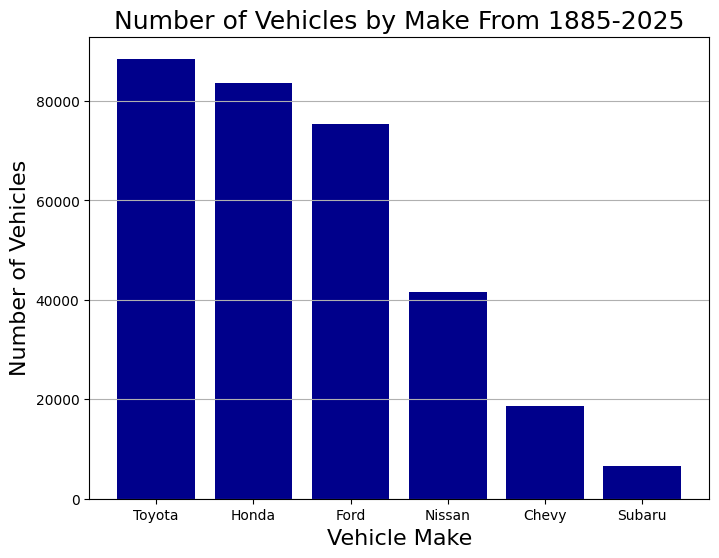

In [27]:
# Make a bar graph that shows the number of cars each make has from Chevy, Nissan, Toyota, Ford, Subaru, Honda
# Define makes to include
selected_makes = ['Toyota', 'Chevy', 'Nissan', 'Subaru', 'Honda', 'Ford']

# Normalize capitalization and whitespace
filtered_df['Make'] = filtered_df['Make'].str.strip().str.title()

# Filter just those makes
make_df = filtered_df[filtered_df['Make'].isin(selected_makes)]

# Count how many of each make
make_counts = make_df['Make'].value_counts()

# Plot
plt.figure(figsize=(8,6))
plt.bar(make_counts.index, make_counts.values, color='darkblue')
plt.title('Number of Vehicles by Make From 1885-2025', fontsize=18)
plt.xlabel('Vehicle Make', fontsize=16)
plt.ylabel('Number of Vehicles', fontsize=16)
plt.grid(axis='y')

plt.savefig('num_vehicle_makes.png', dpi=300, bbox_inches='tight')

plt.show()

The bar graph above demonstrates how many vehicles were made by each make (which I hand-selected) to show the difference in popularity between different makes. We can see that from the chosen makes that Toyota was the most common car to be pulled over. 

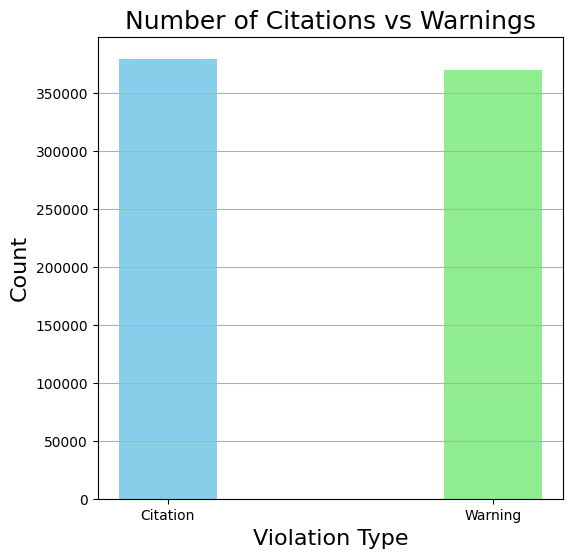

In [26]:
# Make a bar graph that shows how many citations versus warnings were given
counts = filtered_df['Violation Type'].value_counts()

# Select just Citation and Warning
cit_warn = counts.loc[['Citation', 'Warning']]

# Plot
plt.figure(figsize=(6,6))
plt.bar(cit_warn.index, cit_warn.values, color=['skyblue', 'lightgreen'], width = 0.3)
plt.title('Number of Citations vs Warnings', fontsize=18)
plt.xlabel('Violation Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.grid(axis='y')

plt.savefig('citations_vs_warnings.png', dpi=300, bbox_inches='tight')

plt.show()


The bar graph above shows the difference and the total number of Citations given, versus the number of warnings given. As we can see, the margin is fairly close, but if you look carefully, there were more citations given out than warnings. 

# 2.3 Pie Chart(s)

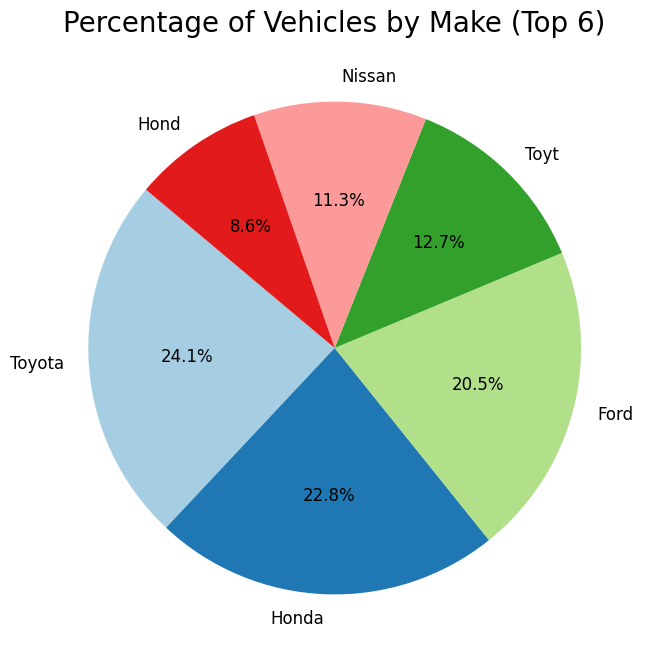

In [25]:
# Make a Pie chart for the percentage of vehicles made by the selected vehicles
make_counts = filtered_df['Make'].value_counts()

top_makes = make_counts.head(6)

# Create the pie chart
plt.figure(figsize=(8,8))
plt.pie(
    top_makes.values,                 
    labels=top_makes.index,           
    autopct='%1.1f%%',                
    startangle=140,                   
    textprops={'fontsize':12},        
    colors=plt.cm.Paired.colors       
)

plt.title('Percentage of Vehicles by Make (Top 6)', fontsize=20)

plt.savefig('Percent_vehicles_made.png', dpi=300, bbox_inches='tight')

plt.show()

The pie chart above demonstrates the different percentages of car makes and how much of the total percentage of cars were made by a ceratin make.

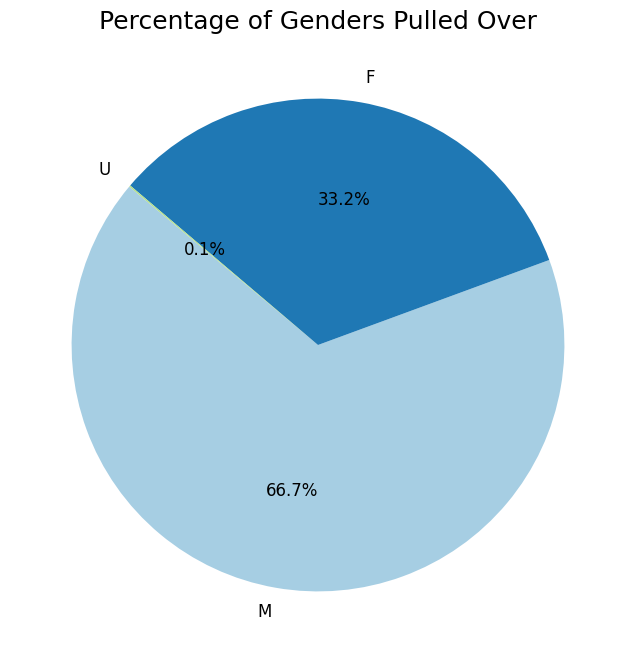

In [24]:
# Make  pie chart to show which gender got pulled over more 
genders = filtered_df['Gender'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    genders.values,                 
    labels = genders.index,           
    autopct ='%1.1f%%',                
    startangle=140,                   
    textprops={'fontsize':12},        
    colors=plt.cm.Paired.colors       
)

plt.title('Percentage of Genders Pulled Over', fontsize = 18)

plt.savefig('Percentage_of_genders.png', dpi=300, bbox_inches='tight')

plt.show()

The above pie chart demonstrates the percentage of people who got pulled over, seperated by genders. This graph was to show/demonstrate which gender got pulled over the most. As we can see, the majority of the people who were documented/pulled over were males, with it being 66.7% of the time being males pulled over. 